In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#파이썬 그래프의 한글 폰트 설정

#한글 폰트 파일의 경로 설정
path = "c:/Windows/Fonts/malgun.ttf"

from matplotlib import font_manager, rc
#한글 폰트 파일의 폰트명을 font_name에 대입
font_name = font_manager.FontProperties(fname=path).get_name()
#파이썬 그래프의 폰트 설정
rc('font', family=font_name)


In [3]:
from selenium import webdriver
import time

In [4]:
#웹드라이버 프로그램 경로 설정
driver = webdriver.Chrome('./program/chromedriver.exe')

In [5]:
#19대 대선결과 홈페이지로 이동
driver.get("http://info.nec.go.kr/main/showDocument.xhtml?electionId=0000000000&topMenuId=VC&secondMenuId=VCCP09")

In [6]:
#대통형 선거 클릭
driver.find_element_by_id("electionType1").click()

In [7]:
#19대 입력
driver.find_element_by_id("electionName").send_keys("제19대")

In [8]:
#대통령 선거 입력
driver.find_element_by_id("electionCode").send_keys("대통령선거")

In [9]:
#아이디 cityCode선택
sido_list_raw = driver.find_element_by_id("cityCode")
#option태그들 선택
sido_list = sido_list_raw.find_elements_by_tag_name("option")


In [10]:
#sido_list에서 option 태그 1개를 option에 대입하고 option의 텍스트를 sido_names_value에 대입
sido_names_values = [option.text for option in sido_list]
sido_names_values

['▽ 선 택',
 '▷ 전 체',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [11]:
#sido_values의 인덱스 2부터 리턴
sido_names_values = sido_names_values[2:]
sido_names_values

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [12]:
import re

def get_num(tmp):
    #( 를 기준으로 문자열을 나눠서
    #첫번째 문자열에서 
    #,를 삭제
    return float(re.split('\(', tmp)[0].replace(',',''))

In [13]:
#DataFrame의 컬럼명 데이터 설정
election_result_raw = {'광역시도' : [],
                       '시군' : [],
                       'pop' : [],
                       'moon' : [],
                       'hong' : [],    
                       'ahn' : [] }

In [14]:
from bs4 import BeautifulSoup

for each_sido in sido_names_values:
    #move_sido(each_sido)
    #시도코드를 선택
    element = driver.find_element_by_id("cityCode")
    #each_sido 시도명 입력
    element.send_keys(each_sido)
    #검색 클릭
    driver.find_element_by_id("searchBtn").click()
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    #id가 table01인 객체 선택
    table = soup.find(id='table01')
    #html태그를 df에 대입
    df = pd.read_html(str(table))
    
   
    for each in df[0].values[1:]:
        election_result_raw['광역시도'].append(each_sido)
        election_result_raw['시군'].append(each[0])
        election_result_raw['pop'].append(each[2])
        election_result_raw['moon'].append(get_num(each[3]))
        election_result_raw['hong'].append(get_num(each[4]))
        election_result_raw['ahn'].append(get_num(each[5]))

In [15]:
#election_resuilt_raw를 DataFrame으로 변환
election_result = pd.DataFrame(election_result_raw, 
                               columns=['광역시도', '시군', 'pop', 'moon','hong','ahn'])
election_result

,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566,42512.0,22325.0,22313.0
1,서울특별시,중구,82852,34062.0,17901.0,19372.0
2,서울특별시,용산구,148157,58081.0,35230.0,32109.0
3,서울특별시,성동구,203175,86686.0,40566.0,45674.0
4,서울특별시,광진구,240030,105512.0,46368.0,52824.0
5,서울특별시,동대문구,236092,98958.0,51631.0,53359.0
6,서울특별시,중랑구,265706,111450.0,56545.0,62778.0
7,서울특별시,성북구,295866,129263.0,57584.0,66518.0
8,서울특별시,강북구,210614,89645.0,42268.0,51669.0
9,서울특별시,도봉구,229233,94898.0,47461.0,55600.0


In [16]:
#크롤링한 결과를 election_result.csv파일로 저장
election_result.to_csv('./data/election_result.csv', encoding='utf-8', sep=',')

In [17]:
#웹 드라이버 종료
driver.close()

In [18]:
#투표 경과가 저장된 election_result.csv를 읽어서 election_result에 대입
election_result = pd.read_csv('./data/election_result.csv', encoding='utf-8', 
                              index_col=0) #0번째 칸을 줄 인덱스로 설정
election_result.head()

,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566,42512.0,22325.0,22313.0
1,서울특별시,중구,82852,34062.0,17901.0,19372.0
2,서울특별시,용산구,148157,58081.0,35230.0,32109.0
3,서울특별시,성동구,203175,86686.0,40566.0,45674.0
4,서울특별시,광진구,240030,105512.0,46368.0,52824.0


In [19]:
#광역 시도 컬럼 리턴
sido_candi =  election_result['광역시도']
#광역시도 컬럼에서 데이터 1개를 name에 대입
#name의 첫번째 문자열 부터 2글자가 '서울','부산','대구','광주','인천','대전','울산' 을 포함하면
#'서울','부산','대구','광주','인천','대전','울산' 을 리턴
#아니면 '' 리턴
sido_candi = [name[:2] if name[:2]  in ['서울','부산','대구','광주','인천','대전','울산']
                        else '' for name in sido_candi
             ]

In [20]:
sido_candi

['서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '광주',
 '광주',
 '광주',
 '광주',
 '광주',
 '대전',
 '대전',
 '대전',
 '대전',
 '대전',
 '울산',
 '울산',
 '울산',
 '울산',
 '울산',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '

In [21]:
def cut_char_sigu(name):
    #문자열의 길이가 2이면 name리턴 아니면(3글자 이상) 마지막 1글자를 제외하고 리턴
    return name if len(name)==2 else name[:-1]

In [22]:
import re
#election_result의 개수 만큼 '' 를 sigun_candi에 대입
sigun_candi = ['']*len(election_result)

#election_result의 index만큼 반복
for n in election_result.index:
    #election_result의 시군 컬럼의 n번째 줄 대입
    each = election_result['시군'][n]
    #'수원', '성남','안양','안산','고양','용인','청주','천안','전주','포항','창원'
    #을 포함한다면 
    if each[:2] in ['수원', '성남','안양','안산','고양',
                            '용인','청주','천안','전주','포항','창원']:
        #시를 기준으로 분리해서 0번째 문자열
        #문자열의 길이가 2이면 name리턴 아니면(3글자 이상) 마지막 1글자를 제외하고 리턴하는 함수
        # cut_char_sigu 함수를 호출
        sigun_candi[n] = re.split('시', each)[0]+' '+  cut_char_sigu(re.split('시', each)[1])
    else:
        sigun_candi[n] = cut_char_sigu(each) 
        
sigun_candi

['종로',
 '중구',
 '용산',
 '성동',
 '광진',
 '동대문',
 '중랑',
 '성북',
 '강북',
 '도봉',
 '노원',
 '은평',
 '서대문',
 '마포',
 '양천',
 '강서',
 '구로',
 '금천',
 '영등포',
 '동작',
 '관악',
 '서초',
 '강남',
 '송파',
 '강동',
 '중구',
 '서구',
 '동구',
 '영도',
 '부산진',
 '동래',
 '남구',
 '북구',
 '해운대',
 '기장',
 '사하',
 '금정',
 '강서',
 '연제',
 '수영',
 '사상',
 '중구',
 '동구',
 '서구',
 '남구',
 '북구',
 '수성',
 '달서',
 '달성',
 '중구',
 '동구',
 '남구',
 '연수',
 '남동',
 '부평',
 '계양',
 '서구',
 '강화',
 '옹진',
 '동구',
 '서구',
 '남구',
 '북구',
 '광산',
 '동구',
 '중구',
 '서구',
 '유성',
 '대덕',
 '중구',
 '남구',
 '동구',
 '북구',
 '울주',
 '세종특별자치',
 '수원 장안',
 '수원 권선',
 '수원 팔달',
 '수원 영통',
 '성남 수정',
 '성남 중원',
 '성남 분당',
 '의정부',
 '안양 만안',
 '안양 동안',
 '부천',
 '광명',
 '평택',
 '양주',
 '동두천',
 '안산 상록',
 '안산 단원',
 '고양 덕양',
 '고양 일산동',
 '고양 일산서',
 '과천',
 '의왕',
 '구리',
 '남양주',
 '오산',
 '화성',
 '시흥',
 '군포',
 '하남',
 '파주',
 '여주',
 '이천',
 '용인 처인',
 '용인 수지',
 '용인 기흥',
 '안성',
 '김포',
 '광주',
 '포천',
 '연천',
 '양평',
 '가평',
 '춘천',
 '원주',
 '강릉',
 '동해',
 '삼척',
 '태백',
 '정선',
 '속초',
 '고성',
 '양양',
 '인제',
 '홍천',
 '횡성',
 '영월',
 '평창',
 '화천',
 '양구

In [23]:
#인덱스 0부터 sigun_candi의 행의 수만큼 반복
#sido_candi[n]+' '+sigun_candi[n] 을 ID_candi 에 대입
ID_candi = [sido_candi[n]+' '+sigun_candi[n] for n in range(0,len(sigun_candi))]

#ID_candi에서 1행을 name에 대입 name[0]==' ' 이면 name[1:] 부터 리턴
ID_candi = [name[1:] if name[0]==' ' else name for name in ID_candi]
#ID_candi에서 1행을 name에 대입 name 의 2번째 문자열까지가 "세종" 이면 name[:2] (세종) 리턴
ID_candi = [name[:2] if name[:2]=='세종' else name for name in ID_candi]

ID_candi

['서울 종로',
 '서울 중구',
 '서울 용산',
 '서울 성동',
 '서울 광진',
 '서울 동대문',
 '서울 중랑',
 '서울 성북',
 '서울 강북',
 '서울 도봉',
 '서울 노원',
 '서울 은평',
 '서울 서대문',
 '서울 마포',
 '서울 양천',
 '서울 강서',
 '서울 구로',
 '서울 금천',
 '서울 영등포',
 '서울 동작',
 '서울 관악',
 '서울 서초',
 '서울 강남',
 '서울 송파',
 '서울 강동',
 '부산 중구',
 '부산 서구',
 '부산 동구',
 '부산 영도',
 '부산 부산진',
 '부산 동래',
 '부산 남구',
 '부산 북구',
 '부산 해운대',
 '부산 기장',
 '부산 사하',
 '부산 금정',
 '부산 강서',
 '부산 연제',
 '부산 수영',
 '부산 사상',
 '대구 중구',
 '대구 동구',
 '대구 서구',
 '대구 남구',
 '대구 북구',
 '대구 수성',
 '대구 달서',
 '대구 달성',
 '인천 중구',
 '인천 동구',
 '인천 남구',
 '인천 연수',
 '인천 남동',
 '인천 부평',
 '인천 계양',
 '인천 서구',
 '인천 강화',
 '인천 옹진',
 '광주 동구',
 '광주 서구',
 '광주 남구',
 '광주 북구',
 '광주 광산',
 '대전 동구',
 '대전 중구',
 '대전 서구',
 '대전 유성',
 '대전 대덕',
 '울산 중구',
 '울산 남구',
 '울산 동구',
 '울산 북구',
 '울산 울주',
 '세종',
 '수원 장안',
 '수원 권선',
 '수원 팔달',
 '수원 영통',
 '성남 수정',
 '성남 중원',
 '성남 분당',
 '의정부',
 '안양 만안',
 '안양 동안',
 '부천',
 '광명',
 '평택',
 '양주',
 '동두천',
 '안산 상록',
 '안산 단원',
 '고양 덕양',
 '고양 일산동',
 '고양 일산서',
 '과천',
 '의왕',
 '구리',
 '남양주',
 '오산',
 '화성',
 '시흥',
 '군포',
 '하남'

In [24]:
#ID컬럼에 ID_candi 대입
election_result['ID'] = ID_candi
election_result.head(10)

,광역시도,시군,pop,moon,hong,ahn,ID
0,서울특별시,종로구,102566,42512.0,22325.0,22313.0,서울 종로
1,서울특별시,중구,82852,34062.0,17901.0,19372.0,서울 중구
2,서울특별시,용산구,148157,58081.0,35230.0,32109.0,서울 용산
3,서울특별시,성동구,203175,86686.0,40566.0,45674.0,서울 성동
4,서울특별시,광진구,240030,105512.0,46368.0,52824.0,서울 광진
5,서울특별시,동대문구,236092,98958.0,51631.0,53359.0,서울 동대문
6,서울특별시,중랑구,265706,111450.0,56545.0,62778.0,서울 중랑
7,서울특별시,성북구,295866,129263.0,57584.0,66518.0,서울 성북
8,서울특별시,강북구,210614,89645.0,42268.0,51669.0,서울 강북
9,서울특별시,도봉구,229233,94898.0,47461.0,55600.0,서울 도봉


In [25]:
#득표 비율 계산
   #'moon','hong','ahn' 컬럼을 pop컬럼으로 나눔
election_result[['rate_moon','rate_hong','rate_ahn']] =  election_result[['moon','hong','ahn']].div(election_result['pop'],  axis=0)

election_result.head()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
0,서울특별시,종로구,102566,42512.0,22325.0,22313.0,서울 종로,0.414484,0.217665,0.217548
1,서울특별시,중구,82852,34062.0,17901.0,19372.0,서울 중구,0.411119,0.216060,0.233815
2,서울특별시,용산구,148157,58081.0,35230.0,32109.0,서울 용산,0.392023,0.237788,0.216723
3,서울특별시,성동구,203175,86686.0,40566.0,45674.0,서울 성동,0.426657,0.199660,0.224801
4,서울특별시,광진구,240030,105512.0,46368.0,52824.0,서울 광진,0.439578,0.193176,0.220072


In [26]:
#'rate_moon','rate_hong','rate_ahn' 컬럼의 값에 100을 곱해서 퍼센트를 계산
election_result[['rate_moon','rate_hong','rate_ahn']] *= 100
election_result.head()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
0,서울특별시,종로구,102566,42512.0,22325.0,22313.0,서울 종로,41.448433,21.766472,21.754773
1,서울특별시,중구,82852,34062.0,17901.0,19372.0,서울 중구,41.111862,21.605996,23.381451
2,서울특별시,용산구,148157,58081.0,35230.0,32109.0,서울 용산,39.202333,23.778829,21.672280
3,서울특별시,성동구,203175,86686.0,40566.0,45674.0,서울 성동,42.665682,19.966039,22.480128
4,서울특별시,광진구,240030,105512.0,46368.0,52824.0,서울 광진,43.957839,19.317585,22.007249


In [27]:
draw_korea = pd.read_csv('./data/draw_korea.csv', encoding='utf-8', index_col=0)
draw_korea.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [28]:
set(draw_korea['ID'].unique()) - set(election_result['ID'].unique())

{'고성(강원)', '고성(경남)', '부천 소사', '부천 오정', '부천 원미', '창원 합포', '창원 회원'}

In [29]:
set(election_result['ID'].unique()) - set(draw_korea['ID'].unique())

{'고성', '부천', '창원 마산합포', '창원 마산회원'}

In [30]:
election_result[election_result['ID'] == '고성']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
125,강원도,고성군,18692,5664.0,6511.0,3964.0,고성,30.301733,34.833084,21.206933
233,경상남도,고성군,34603,9848.0,16797.0,4104.0,고성,28.459960,48.542034,11.860243


In [31]:
election_result.loc[125, 'ID'] = '고성(강원)'
election_result.loc[233, 'ID'] = '고성(경남)'

election_result[election_result['시군'] == '고성군']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
125,강원도,고성군,18692,5664.0,6511.0,3964.0,고성(강원),30.301733,34.833084,21.206933
233,경상남도,고성군,34603,9848.0,16797.0,4104.0,고성(경남),28.459960,48.542034,11.860243


In [32]:
election_result[election_result['광역시도'] == '경상남도']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
226,경상남도,창원시의창구,164047,60757.0,56887.0,22830.0,창원 의창,37.036337,34.677257,13.916743
227,경상남도,창원시성산구,153327,63717.0,42052.0,22923.0,창원 성산,41.556282,27.426350,14.950400
228,경상남도,창원시마산합포구,119281,35592.0,54488.0,14686.0,창원 마산합포,29.838784,45.680368,12.312103
229,경상남도,창원시마산회원구,136757,45014.0,56340.0,17744.0,창원 마산회원,32.915317,41.197160,12.974839
230,경상남도,창원시진해구,114779,41249.0,40049.0,17435.0,창원 진해,35.937759,34.892271,15.190061
231,경상남도,진주시,222813,73929.0,93751.0,26687.0,진주,33.179841,42.076091,11.977308
232,경상남도,통영시,82855,25477.0,36128.0,10738.0,통영,30.748899,43.603886,12.959990
233,경상남도,고성군,34603,9848.0,16797.0,4104.0,고성(경남),28.459960,48.542034,11.860243
234,경상남도,사천시,71555,22370.0,32475.0,8350.0,사천,31.262665,45.384669,11.669345
235,경상남도,김해시,318253,147972.0,82880.0,45126.0,김해,46.495084,26.042174,14.179285


In [33]:
election_result.loc[228, 'ID'] = '창원 합포'
election_result.loc[229, 'ID'] = '창원 회원'

election_result[election_result['광역시도'] == '경상남도']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
226,경상남도,창원시의창구,164047,60757.0,56887.0,22830.0,창원 의창,37.036337,34.677257,13.916743
227,경상남도,창원시성산구,153327,63717.0,42052.0,22923.0,창원 성산,41.556282,27.426350,14.950400
228,경상남도,창원시마산합포구,119281,35592.0,54488.0,14686.0,창원 합포,29.838784,45.680368,12.312103
229,경상남도,창원시마산회원구,136757,45014.0,56340.0,17744.0,창원 회원,32.915317,41.197160,12.974839
230,경상남도,창원시진해구,114779,41249.0,40049.0,17435.0,창원 진해,35.937759,34.892271,15.190061
231,경상남도,진주시,222813,73929.0,93751.0,26687.0,진주,33.179841,42.076091,11.977308
232,경상남도,통영시,82855,25477.0,36128.0,10738.0,통영,30.748899,43.603886,12.959990
233,경상남도,고성군,34603,9848.0,16797.0,4104.0,고성(경남),28.459960,48.542034,11.860243
234,경상남도,사천시,71555,22370.0,32475.0,8350.0,사천,31.262665,45.384669,11.669345
235,경상남도,김해시,318253,147972.0,82880.0,45126.0,김해,46.495084,26.042174,14.179285


In [34]:
set(draw_korea['ID'].unique()) - set(election_result['ID'].unique())

{'부천 소사', '부천 오정', '부천 원미'}

In [35]:
set(election_result['ID'].unique()) - set(draw_korea['ID'].unique())

{'부천'}

In [36]:
election_result[election_result['시군'] == '부천시']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
85,경기도,부천시,543777,239697.0,100544.0,128297.0,부천,44.080018,18.489932,23.593679


In [37]:
election_result.tail()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
245,경상남도,산청군,24513,6561.0,12544.0,2753.0,산청,26.765390,51.172847,11.230776
246,경상남도,거창군,41325,11256.0,19976.0,4923.0,거창,27.237750,48.338778,11.912886
247,경상남도,합천군,33021,7143.0,19699.0,3077.0,합천,21.631689,59.655976,9.318313
248,제주특별자치도,제주시,273163,125717.0,48027.0,55971.0,제주,46.022704,17.581810,20.489964
249,제주특별자치도,서귀포시,101296,43776.0,20036.0,21890.0,서귀포,43.215922,19.779656,21.609935


In [38]:
ahn_tmp = election_result.loc[85, 'ahn']
ahn_tmp

128297.0

In [39]:
election_result.loc[250]=election_result.loc[85]
election_result.loc[251]=election_result.loc[85]
election_result.loc[252]=election_result.loc[85]

In [40]:
election_result[election_result['시군'] == '부천시']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
85,경기도,부천시,543777,239697.0,100544.0,128297.0,부천,44.080018,18.489932,23.593679
250,경기도,부천시,543777,239697.0,100544.0,128297.0,부천,44.080018,18.489932,23.593679
251,경기도,부천시,543777,239697.0,100544.0,128297.0,부천,44.080018,18.489932,23.593679
252,경기도,부천시,543777,239697.0,100544.0,128297.0,부천,44.080018,18.489932,23.593679


In [41]:
election_result.loc[250, 'ID']='부천 소사'
election_result.loc[251, 'ID']='부천 오정'
election_result.loc[252, 'ID']='부천 원미'

In [42]:
election_result[election_result['시군'] == '부천시']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
85,경기도,부천시,543777,239697.0,100544.0,128297.0,부천,44.080018,18.489932,23.593679
250,경기도,부천시,543777,239697.0,100544.0,128297.0,부천 소사,44.080018,18.489932,23.593679
251,경기도,부천시,543777,239697.0,100544.0,128297.0,부천 오정,44.080018,18.489932,23.593679
252,경기도,부천시,543777,239697.0,100544.0,128297.0,부천 원미,44.080018,18.489932,23.593679


In [43]:
election_result.drop([85], inplace=True)
election_result[election_result['시군'] == '부천시']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
250,경기도,부천시,543777,239697.0,100544.0,128297.0,부천 소사,44.080018,18.489932,23.593679
251,경기도,부천시,543777,239697.0,100544.0,128297.0,부천 오정,44.080018,18.489932,23.593679
252,경기도,부천시,543777,239697.0,100544.0,128297.0,부천 원미,44.080018,18.489932,23.593679


In [44]:
set(draw_korea['ID'].unique()) - set(election_result['ID'].unique())

set()

In [45]:
set(election_result['ID'].unique()) - set(draw_korea['ID'].unique())

set()

In [46]:
final_elect_data = pd.merge(election_result, draw_korea, how='left', on=['ID'])
final_elect_data.head()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn,y,x
0,서울특별시,종로구,102566,42512.0,22325.0,22313.0,서울 종로,41.448433,21.766472,21.754773,4,6
1,서울특별시,중구,82852,34062.0,17901.0,19372.0,서울 중구,41.111862,21.605996,23.381451,5,6
2,서울특별시,용산구,148157,58081.0,35230.0,32109.0,서울 용산,39.202333,23.778829,21.672280,6,6
3,서울특별시,성동구,203175,86686.0,40566.0,45674.0,서울 성동,42.665682,19.966039,22.480128,5,7
4,서울특별시,광진구,240030,105512.0,46368.0,52824.0,서울 광진,43.957839,19.317585,22.007249,6,7


In [47]:
final_elect_data['moon_vs_hong'] = final_elect_data['rate_moon'] - \
                                                                final_elect_data['rate_hong']
final_elect_data['moon_vs_ahn'] = final_elect_data['rate_moon'] - \
                                                                final_elect_data['rate_ahn']
final_elect_data['ahn_vs_hong'] = final_elect_data['rate_ahn'] - \
                                                                final_elect_data['rate_hong']
final_elect_data.head()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn,y,x,moon_vs_hong,moon_vs_ahn,ahn_vs_hong
0,서울특별시,종로구,102566,42512.0,22325.0,22313.0,서울 종로,41.448433,21.766472,21.754773,4,6,19.681961,19.693661,-0.011700
1,서울특별시,중구,82852,34062.0,17901.0,19372.0,서울 중구,41.111862,21.605996,23.381451,5,6,19.505866,17.730411,1.775455
2,서울특별시,용산구,148157,58081.0,35230.0,32109.0,서울 용산,39.202333,23.778829,21.672280,6,6,15.423503,17.530053,-2.106549
3,서울특별시,성동구,203175,86686.0,40566.0,45674.0,서울 성동,42.665682,19.966039,22.480128,5,7,22.699643,20.185554,2.514089
4,서울특별시,광진구,240030,105512.0,46368.0,52824.0,서울 광진,43.957839,19.317585,22.007249,6,7,24.640253,21.950590,2.689664


In [96]:
def drawKorea(targetData, blockedMap, cmapname):
    datalabel = targetData
    print("datalabel:",datalabel)
    print("blockedMap:",blockedMap[["moon_vs_hong","x","y"]].head())
    

In [97]:
drawKorea('moon_vs_hong', final_elect_data, 'RdBu')

datalabel: moon_vs_hong
blockedMap:    moon_vs_hong  x  y
0     19.681961  6  4
1     19.505866  6  5
2     15.423503  6  6
3     22.699643  7  5
4     24.640253  7  6


In [134]:
def drawKorea(targetData, blockedMap, cmapname):
    datalabel = targetData
    print("datalabel:",datalabel)
    print("blockedMap:",blockedMap[["moon_vs_hong","x","y"]].head())
    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    print("mapdata:",mapdata.head(10))

In [135]:
drawKorea('moon_vs_hong', final_elect_data, 'RdBu')

datalabel: moon_vs_hong
blockedMap:    moon_vs_hong  x  y
0     19.681961  6  4
1     19.505866  6  5
2     15.423503  6  6
3     22.699643  7  5
4     24.640253  7  6
mapdata: x  0          1          2          3          4          5          6   \
y                                                                         
0 NaN        NaN        NaN        NaN        NaN        NaN        NaN   
1 NaN        NaN        NaN  13.636439   6.688053  -4.090671  -0.439197   
2 NaN        NaN        NaN  22.608478  24.770442  20.693792  24.204664   
3 NaN        NaN  20.168038  26.360002  20.085305  22.494706  24.226846   
4 NaN        NaN  25.590086  20.991696  26.910121  25.111281  19.681961   
5 NaN -11.124767  25.590086  25.233013  25.237097  27.545215  19.505866   
6 NaN  24.835329  25.590086  25.283099  25.001007  24.320437  15.423503   
7 NaN  11.315813  25.097170  26.005233  23.493821  28.453479  10.762471   
8 NaN        NaN  23.248253  25.051134  20.985561  23.428811   8.557004  

In [133]:
a = np.arange(4)
print("a:",a)
b=np.ma.masked_where(a <= 2, a)
print("b:",b)

a: [0 1 2 3]
b: [-- -- -- 3]


In [136]:
def drawKorea(targetData, blockedMap, cmapname):
    datalabel = targetData
    #print("datalabel:",datalabel)
    #print("blockedMap:",blockedMap[["moon_vs_hong","x","y"]].head())
    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    print("mapdata:",mapdata.head())
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    print("masked_mapdata:",masked_mapdata[0:5])

In [137]:
drawKorea('moon_vs_hong', final_elect_data, 'RdBu')

mapdata: x  0   1          2          3          4          5          6          7   \
y                                                                             
0 NaN NaN        NaN        NaN        NaN        NaN        NaN   1.927636   
1 NaN NaN        NaN  13.636439   6.688053  -4.090671  -0.439197  19.804811   
2 NaN NaN        NaN  22.608478  24.770442  20.693792  24.204664  19.863960   
3 NaN NaN  20.168038  26.360002  20.085305  22.494706  24.226846  -7.692110   
4 NaN NaN  25.590086  20.991696  26.910121  25.111281  19.681961  20.045999   

x         8          9         10        11  12  13  
y                                                    
0   0.831236   1.858836 -4.531350       NaN NaN NaN  
1   2.722760  13.293230  2.473130       NaN NaN NaN  
2   0.691899  -5.399531 -9.354170       NaN NaN NaN  
3  20.303072  18.357241 -0.222138 -2.157181 NaN NaN  
4  20.663816  -4.884880 -1.740152 -3.285802 NaN NaN  
masked_mapdata: [[-- -- -- -- -- -- -- 1.9276363261519442 0

In [142]:
def drawKorea(targetData, blockedMap, cmapname):
    datalabel = targetData
    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    print("masked_mapdata:",masked_mapdata[0:3])
    
    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    
    vmin, vmax = -tmp_max, tmp_max
    print("vmin:",vmin,":vmax:",vmax)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata[0:3], vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)
    plt.show()

masked_mapdata: [[-- -- -- -- -- -- -- 1.9276363261519442 0.831235731428908
  1.8588362068965445 -4.5313503102931705 -- -- --]
 [-- -- -- 13.636438554852319 6.688053057472924 -4.090671316477771
  -0.43919664533215297 19.804810579725146 2.7227603488988485
  13.293230004719156 2.4731297222517803 -- -- --]
 [-- -- -- 22.608477569517248 24.770442439337852 20.69379190605192
  24.204664188577095 19.863960278612566 0.6918988269794681
  -5.399531361429009 -9.354170167478856 -- -- --]]
vmin: -65.06990868058043 :vmax: 65.06990868058043


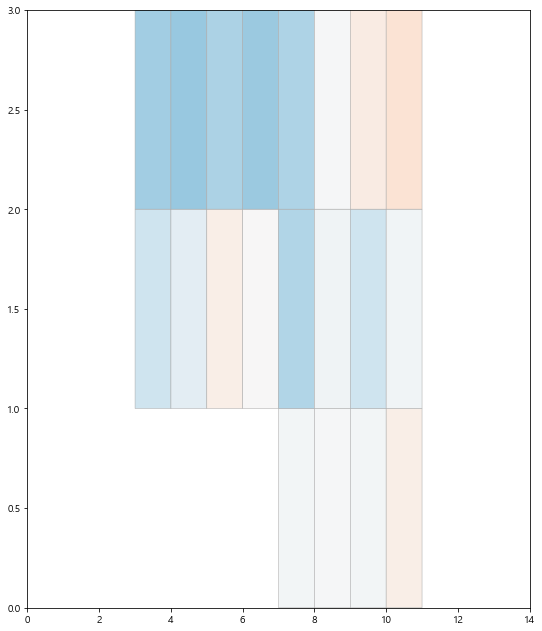

In [143]:
drawKorea('moon_vs_hong', final_elect_data, 'RdBu')

In [146]:
def drawKorea(targetData, blockedMap, cmapname):
    datalabel = targetData
    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
  
    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    
    vmin, vmax = -tmp_max, tmp_max
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)
    plt.show()

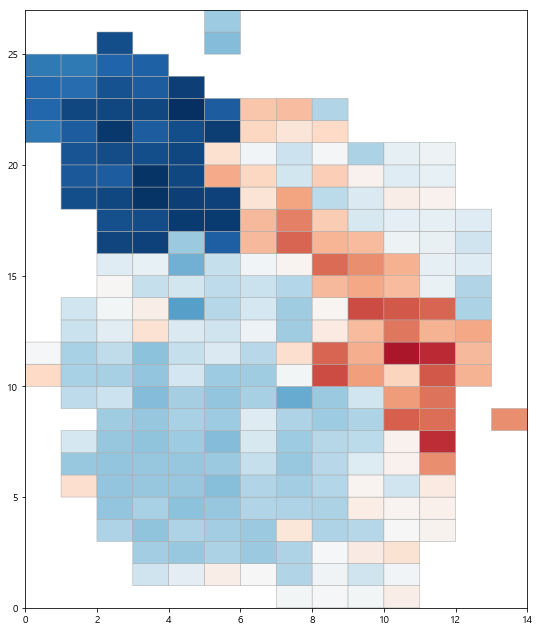

In [147]:
drawKorea('moon_vs_hong', final_elect_data, 'RdBu')

In [150]:
def drawKorea(targetData, blockedMap, cmapname):
    datalabel = targetData
    whitelabelmin = 20.
    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    
    vmin, vmax = -tmp_max, tmp_max
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)
    
    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
        
    plt.show()

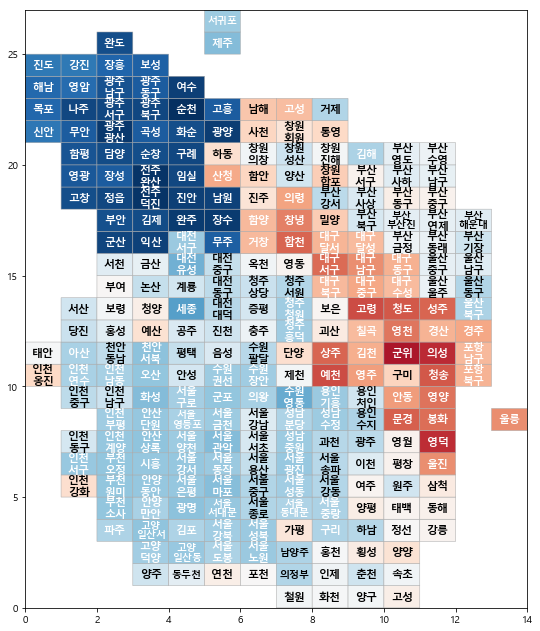

In [151]:
drawKorea('moon_vs_hong', final_elect_data, 'RdBu')

In [ ]:
BORDER_LINES = [
    [(5, 1), (5,2),(7,2), (7,3),(11,3), (11,0)]
]

In [154]:
def drawKorea(targetData, blockedMap, cmapname):
    datalabel = targetData
    whitelabelmin = 20.
    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    
    vmin, vmax = -tmp_max, tmp_max
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)
    
    
    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

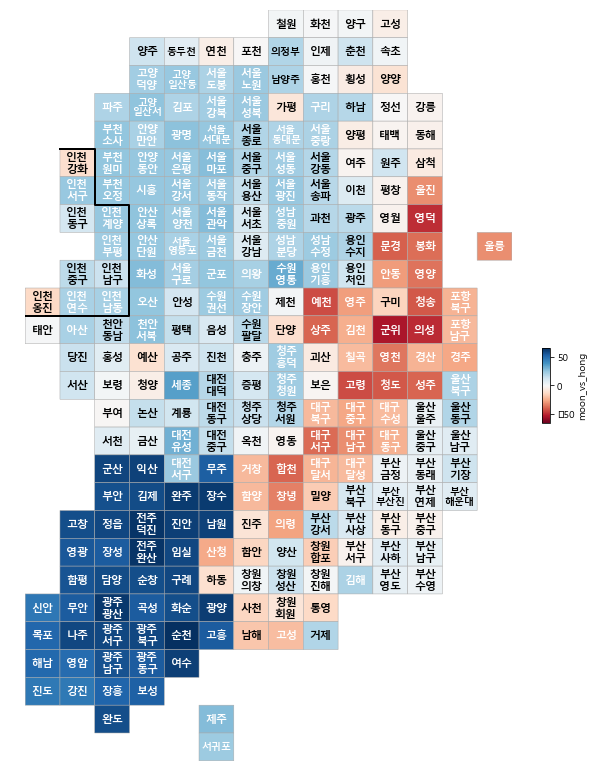

In [155]:
drawKorea('moon_vs_hong', final_elect_data, 'RdBu')

In [157]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [158]:
pop_folium = final_elect_data.set_index('ID')

del pop_folium['광역시도']
del pop_folium['시군']

pop_folium.head()

,pop,moon,hong,ahn,rate_moon,rate_hong,rate_ahn,y,x,moon_vs_hong,moon_vs_ahn,ahn_vs_hong
ID,,,,,,,,,,,,
서울 종로,102566,42512.0,22325.0,22313.0,41.448433,21.766472,21.754773,4,6,19.681961,19.693661,-0.011700
서울 중구,82852,34062.0,17901.0,19372.0,41.111862,21.605996,23.381451,5,6,19.505866,17.730411,1.775455
서울 용산,148157,58081.0,35230.0,32109.0,39.202333,23.778829,21.672280,6,6,15.423503,17.530053,-2.106549
서울 성동,203175,86686.0,40566.0,45674.0,42.665682,19.966039,22.480128,5,7,22.699643,20.185554,2.514089
서울 광진,240030,105512.0,46368.0,52824.0,43.957839,19.317585,22.007249,6,7,24.640253,21.950590,2.689664


In [160]:
geo_path = './data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['moon_vs_hong'],
               columns = [pop_folium.index, pop_folium['moon_vs_hong']],
               fill_color = 'RdBu', 
               key_on = 'feature.id')

map